#1

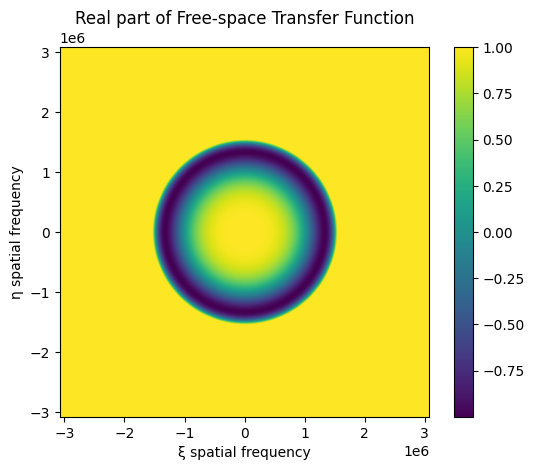

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
lambda_ = 650e-9  # 650 nm (visible red light for example)
z = lambda_  # Propagation distance set to one wavelength for starters

# Create a grid of spatial frequencies
xi = np.linspace(-2/lambda_, 2/lambda_, 400)
eta = np.linspace(-2/lambda_, 2/lambda_, 400)
xi, eta = np.meshgrid(xi, eta)

# Calculate the free-space transfer function
inside_sqrt = 1/lambda_**2 - (xi**2 + eta**2)
# To avoid a complex error, we'll clip values where the inside of the sqrt is negative
inside_sqrt = np.clip(inside_sqrt, 0, None)
Uph = np.exp(2j * np.pi * z * np.sqrt(inside_sqrt))

# Plot the real part of the transfer function
plt.imshow(np.real(Uph), extent=(xi.min(), xi.max(), eta.min(), eta.max()))
plt.colorbar()
plt.title('Real part of Free-space Transfer Function')
plt.xlabel('ξ spatial frequency')
plt.ylabel('η spatial frequency')
plt.savefig('1.jpg')
plt.show()

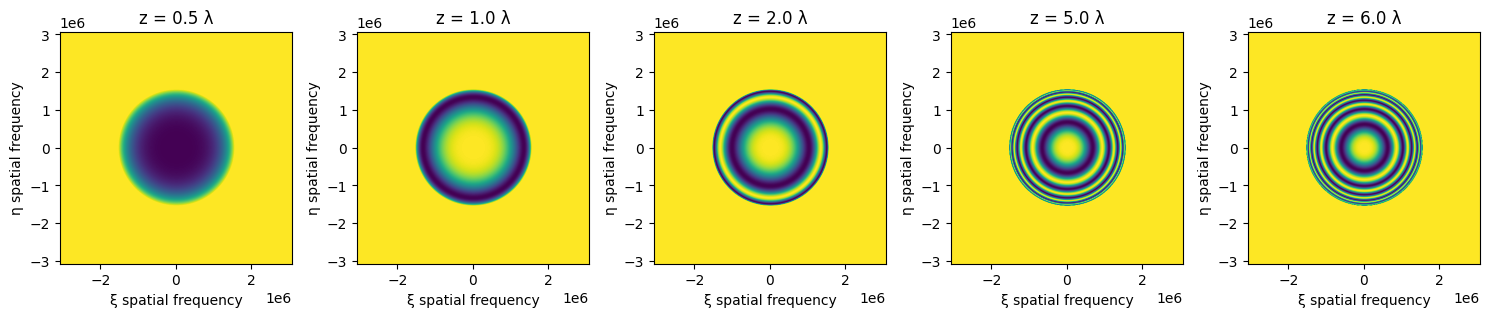

In [2]:
# Constants
lambda_ = 650e-9  # 650 nm (visible red light, for example)

# Define spatial frequency grid
xi = np.linspace(-2/lambda_, 2/lambda_, 500)
eta = np.linspace(-2/lambda_, 2/lambda_, 500)
xi, eta = np.meshgrid(xi, eta)

# Function to calculate transfer function for a given propagation distance
def transfer_function(z, lambda_, xi, eta):
    inside_sqrt = 1/lambda_**2 - (xi**2 + eta**2)
    inside_sqrt = np.clip(inside_sqrt, 0, None)  # Clipping negative values for a real sqrt
    Uph = np.exp(2j * np.pi * z * np.sqrt(inside_sqrt))
    return Uph

# List of propagation distances
distances = [0.5*lambda_, lambda_, 2*lambda_, 5*lambda_, 6*lambda_]

# Plot the real part of transfer function for each distance
fig, axes = plt.subplots(1, len(distances), figsize=(15, 4))

for ax, z in zip(axes, distances):
    Uph = transfer_function(z, lambda_, xi, eta)
    ax.imshow(np.real(Uph), extent=(xi.min(), xi.max(), eta.min(), eta.max()))
    ax.set_title(f"z = {z/lambda_} λ")
    ax.set_xlabel('ξ spatial frequency')
    ax.set_ylabel('η spatial frequency')

plt.tight_layout()
plt.savefig('1b.jpg')
plt.show()

#2

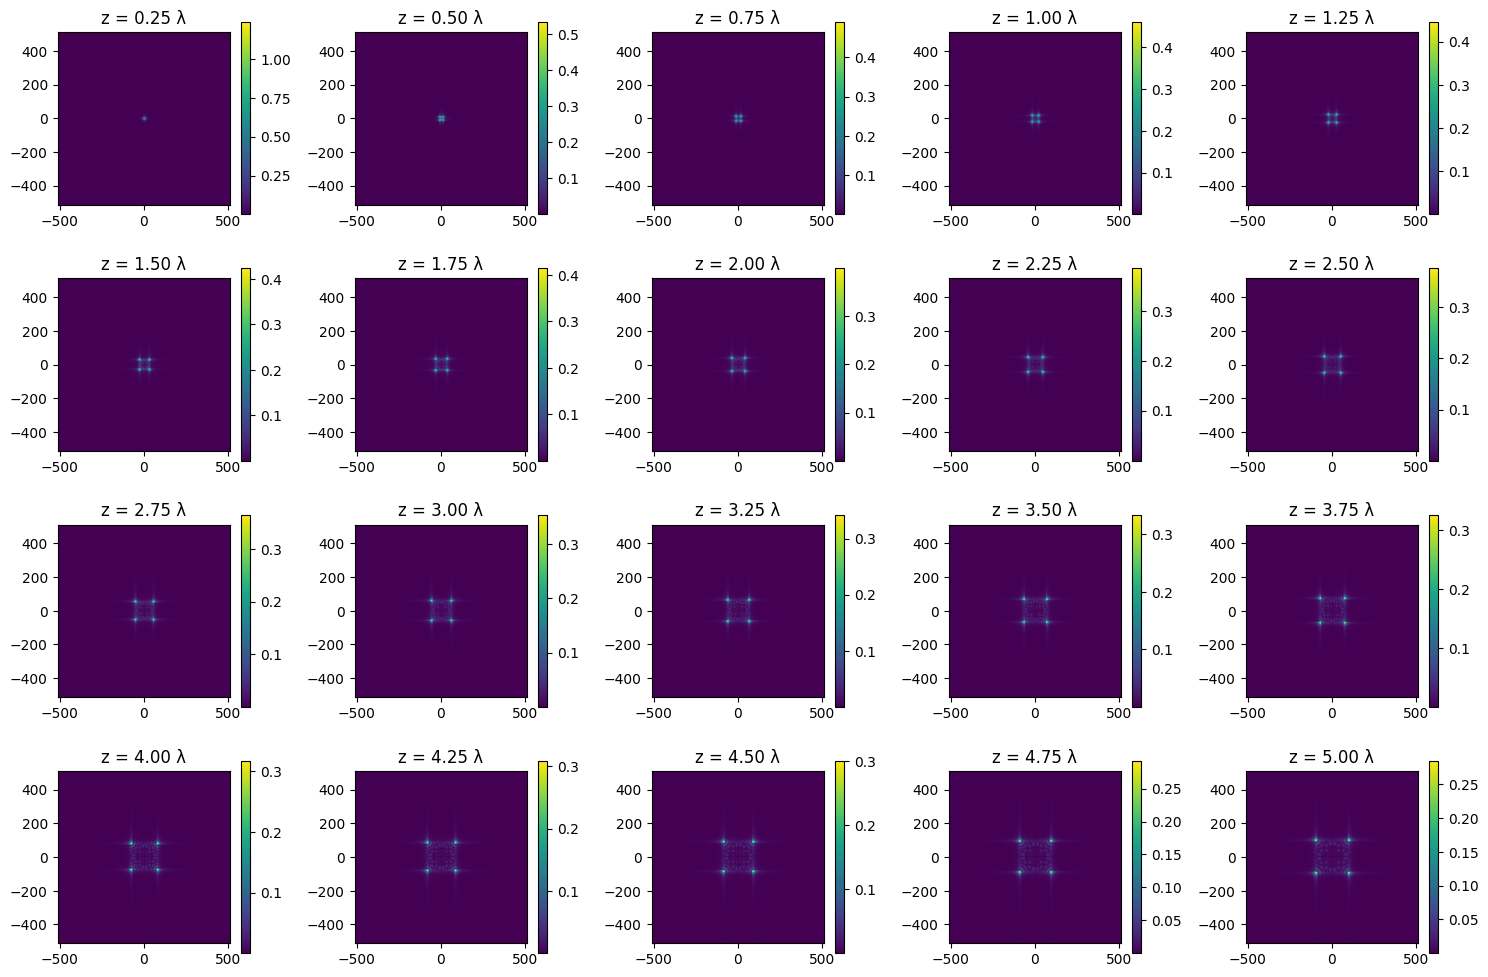

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Define the circle aperture
size = 1024
x = np.linspace(-size//2, size//2, size)
y = np.linspace(-size//2, size//2, size)
X, Y = np.meshgrid(x, y)
radius = 5  # pixels, make this smaller to be on the scale of the wavelength
circle = np.sqrt(X**2 + Y**2) < radius

# 2. Fresnel propagation function
def fresnel_propagate(u0, wavelength, z, pixel_size):
    k = 2 * np.pi / wavelength
    fx = np.fft.fftfreq(u0.shape[0], pixel_size)
    fy = np.fft.fftfreq(u0.shape[1], pixel_size)
    FX, FY = np.meshgrid(fx, fy)

    H = np.exp(1j * k * z) * np.exp(-1j * np.pi * wavelength * z * (FX**2 + FY**2))
    U0 = np.fft.fftshift(np.fft.fft2(u0))
    Uz = U0 * H
    uz = np.fft.ifft2(np.fft.ifftshift(Uz))

    return uz

pixel_size = 0.1e-6  # Modify to be smaller
wavelength = 0.65e-6
distances = np.arange(1, 21) * wavelength / 4

plt.figure(figsize=(15, 10))
for i, z in enumerate(distances, 1):
    uz = fresnel_propagate(circle, wavelength, z, pixel_size)
    plt.subplot(4, 5, i)
    plt.imshow(np.abs(uz), extent=(x.min(), x.max(), y.min(), y.max()), cmap='viridis')
    plt.colorbar()
    plt.title(f"z = {z/wavelength:.2f} λ")
plt.tight_layout()
plt.savefig('2.jpg')
plt.show()

#3

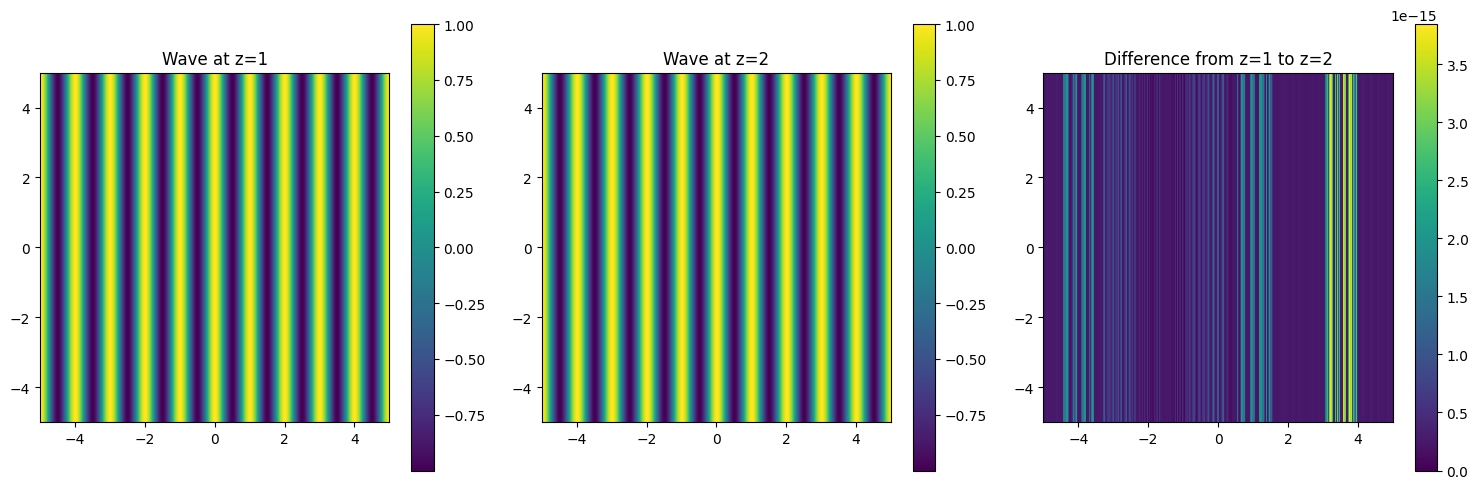

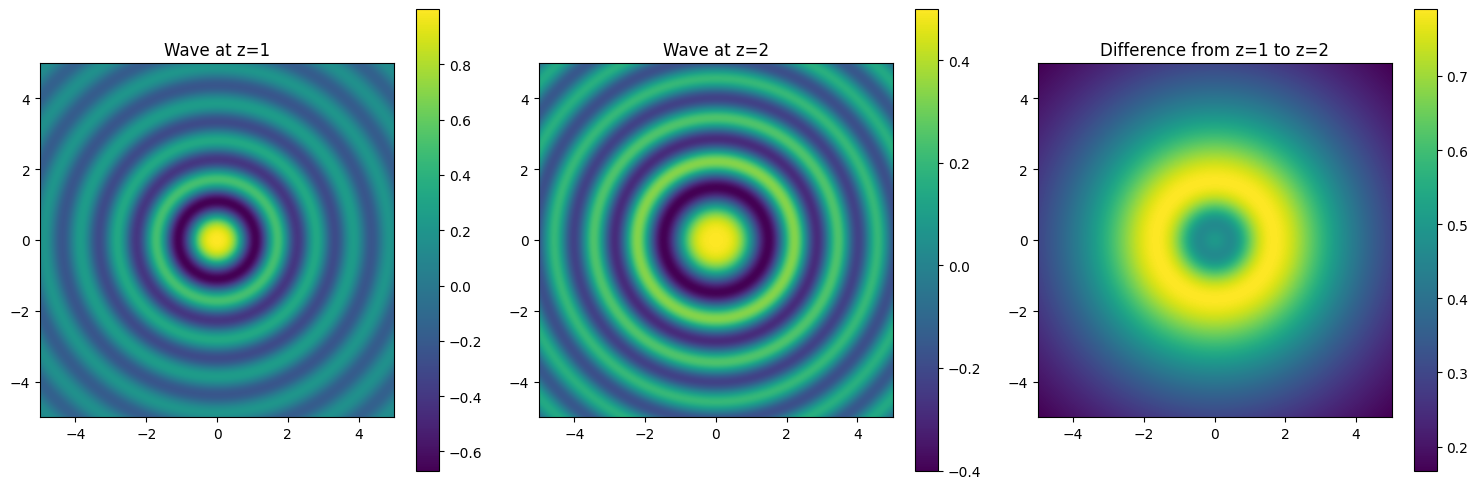

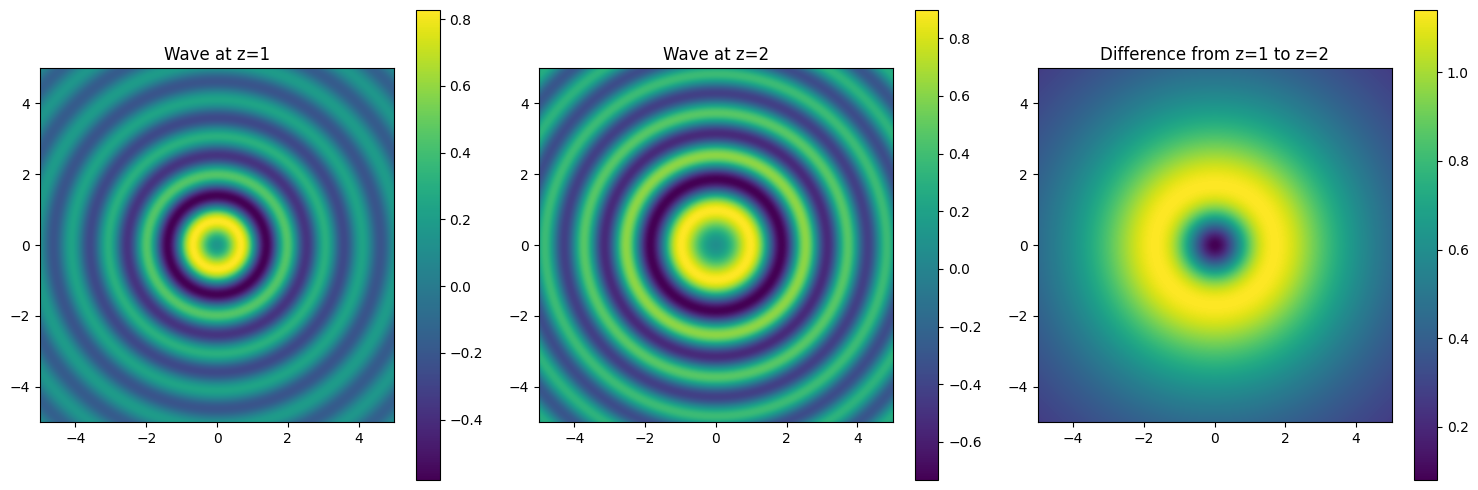

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
k = 2 * np.pi  # assuming wavelength = 1 for simplicity
lambda_ = 1.0

# 1. Define the Waves:

def plane_wave(x, y, z, ξ, η, ζ):
    return np.exp(2 * np.pi * 1j * (ξ * x + η * y + ζ * z))

def spherical_wave(x, y, z):
    r = np.sqrt(x**2 + y**2 + z**2)
    return np.exp(1j * k * r) / r

def pinhole_wave(x, y, z):
    r = np.sqrt(x**2 + y**2 + z**2)
    temp = 1j * k - 1/r
    return (-1 / (2 * np.pi)) * temp * np.exp(1j * k * r) * z / r

# Visualization:

def plot_wave_and_difference(wave_function, x_range, y_range):
    x = np.linspace(*x_range, 400)
    y = np.linspace(*y_range, 400)
    X, Y = np.meshgrid(x, y)

    wave_z1 = wave_function(X, Y, 1)
    wave_z2 = wave_function(X, Y, 2)
    difference = np.abs(wave_z2 - wave_z1)

    fig, axes = plt.subplots(1, 3, figsize=(15,5))

    im1 = axes[0].imshow(np.real(wave_z1), extent=(x_range + y_range), origin='lower')
    axes[0].set_title(f"Wave at z=1")
    fig.colorbar(im1, ax=axes[0])

    im2 = axes[1].imshow(np.real(wave_z2), extent=(x_range + y_range), origin='lower')
    axes[1].set_title(f"Wave at z=2")
    fig.colorbar(im2, ax=axes[1])

    im3 = axes[2].imshow(np.real(difference), extent=(x_range + y_range), origin='lower')
    axes[2].set_title(f"Difference from z=1 to z=2")
    fig.colorbar(im3, ax=axes[2])

    plt.tight_layout()
    plt.savefig('3c.png')
    plt.show()

# Testing the functions:

# Display plane wave at z=1, z=2 and their difference
plot_wave_and_difference(lambda x, y, z: plane_wave(x, y, z, 1, 0, 1), (-5, 5), (-5, 5))

# Display spherical wave at z=1, z=2 and their difference
plot_wave_and_difference(spherical_wave, (-5, 5), (-5, 5))

# Display pinhole wave at z=1, z=2 and their difference
plot_wave_and_difference(pinhole_wave, (-5, 5), (-5, 5))


#4

<ipython-input-4-cce6ef73ab06>:12: RuntimeWarning: invalid value encountered in sqrt
  Uph = np.exp(2j * np.pi * z * np.sqrt(1/λ**2 - (ξ**2 + η**2)))


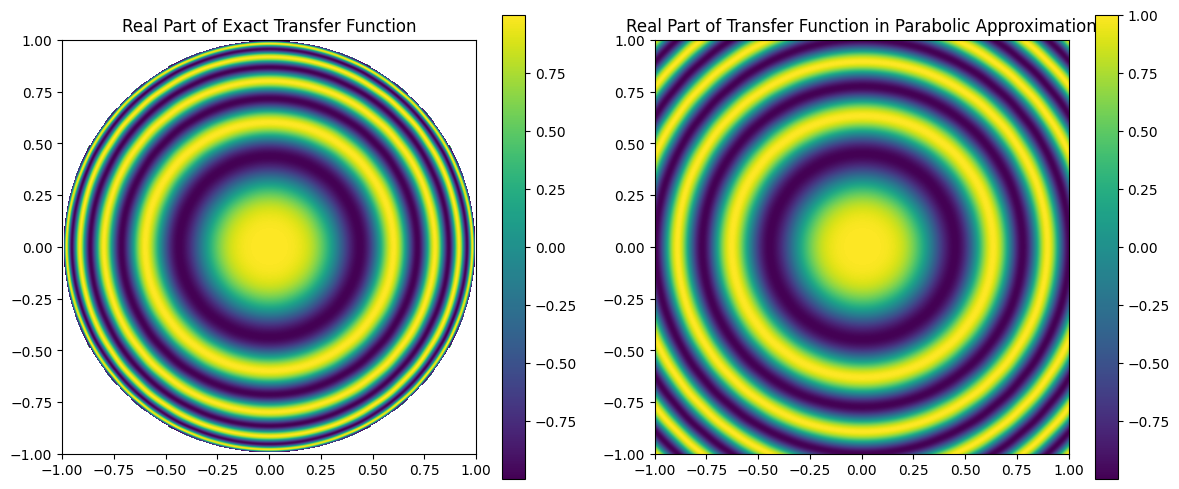

In [4]:
# Define parameters
λ = 1  # For simplicity; you may need to adjust this
k = 2 * np.pi / λ
z1 = 5.0  # Adjust based on requirement
z0 = 0
z = z1 - z0

# Create a 2D grid for ξ and η
ξ, η = np.meshgrid(np.linspace(-1/λ, 1/λ, 400), np.linspace(-1/λ, 1/λ, 400))

# Calculate exact transfer function
Uph = np.exp(2j * np.pi * z * np.sqrt(1/λ**2 - (ξ**2 + η**2)))
CTF = np.real(Uph)

# Calculate transfer function in the parabolic approximation
H = np.exp(1j * k * z) * np.exp(-1j * np.pi * λ * z * (ξ**2 + η**2))
H_real = np.real(H)

# Plot
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.imshow(CTF, extent=[-1/λ, 1/λ, -1/λ, 1/λ])
plt.title('Real Part of Exact Transfer Function')
plt.colorbar()

plt.subplot(1, 2, 2)
plt.imshow(H_real, extent=[-1/λ, 1/λ, -1/λ, 1/λ])
plt.title('Real Part of Transfer Function in Parabolic Approximation')
plt.colorbar()

plt.tight_layout()
plt.savefig('4.jpg')
plt.show()